In [2]:
from __future__ import print_function
import numpy as np
import numpy.linalg as LA
from scipy import optimize
from maxvolpy.maxvol import rect_maxvol, maxvol
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import gen_mat as gen
import grad_log_det as log_det # this is a module with analytical calculation of gradient and objective 
from mva_test import test_points_gen
from numba import jit, njit, prange
from mva_test import *
import os
import itertools
%matplotlib inline

In [3]:
def GD_points(num_col=50, num_points=54, num_tries=1, interval=(-1.0,1.0), poly=gen.cheb):
    log_det.num_col = num_col
    log_det.dim = dim  
    bnds = (interval,) * (dim*num_points)
    dstrs = ['LHS']
        
    loss_f = lambda x: log_det.loss_func(x, poly=poly, ToGenDiff=False)
    loss_grad = lambda x: log_det.grad(x, poly=poly)
    res = np.inf
    for distrib in dstrs:
        for _ in range(num_tries):
            x_0 = test_points_gen(num_points, dim, interval=interval, distrib=distrib) # starting point of GD
            x_0 = x_0.ravel('F')
            op = optimize.fmin_l_bfgs_b(loss_f, x_0, fprime = loss_grad, factr = 10.0, bounds = bnds)
            res_cur = op[1]
            if res_cur < res:
                res = res_cur
                pnts = op[0]
            
    pnts = pnts.reshape(pnts.size//dim, dim, order="F")             
    return pnts

def Maxvol_points(num_col=50, num_points=54, interval=(-1.0,1.0), poly=gen.cheb):
    big = test_points_gen(int(1e5), 2, interval=interval, distrib='LHS')
    M = gen.GenMat(num_col, big, poly = poly, ToGenDiff=False) 
    row_indx,_ = rect_maxvol(M, tol = 1.01, minK = num_points, maxK = num_points)
    pnts = M[row_indx][:,1:3]
    return pnts

In [7]:
%ls

factor_1.1_gauss_col-44_col-64.pdf
factor_1.4_gauss_col-44_col-64.pdf
factor_1.4_gauss_col-44_col-64.png
factor_2.5_gauss_col-44_col-64.pdf
factor_2_gauss_col-44_col-64.pdf
factor_2_gauss_col-44_col-64.png
gauss.pdf
gauss_col-44_col-64.pdf
gauss_col-44_col-64.png
gauss_col-44_col-64_short.pdf
gauss_col-44_col-64_short.png
gauss_col=44_col=64_poly=cheb.txt
ipopt_cheese.png
ipopt_circle.png
ipopt_diamond.png
lebeg_1D.pdf
lebeg_1D.png
lebeg_1D_short.pdf
lebeg_1D_short.png
lebeg_2D_col-10_col-70.png
lebeg_2D_col-10_col-70_v2.png
lebeg_2D_col-10_col-70_v3.pdf
lebeg_2D_col-10_col-70_v3.png
lebesgue_col=10_col=70.txt
lhs_40.pdf
lhs_40.png
maxvol_40.pdf
maxvol_40.png
n_factor=1.069_gauss_col=44_col=64_poly=cheb.txt
n_factor=1.0_gauss_col=44_col=64_poly=cheb.txt
n_factor=1.138_gauss_col=44_col=64_poly=cheb.txt
n_factor=1.207_gauss_col=44_col=64_poly=cheb.txt
n_factor=1.276_gauss_col=44_col=64_poly=cheb.txt
n_factor=1.345_gauss_col=44_col=64_poly=cheb.txt
n_factor=1.414_gauss_col=44_col=64_poly=

In [8]:
d = np.loadtxt('/Users/vitaly/Desktop/GD-paper_(final)/oversampling/oversampling_new/sincos_col=30_col=48_poly=legendre_noise=0.01.txt')

In [9]:
INFTY = np.split(d,4)[2]
INFTY_s = np.split(d,4)[3]
INFTY_m = np.split(d,4)[0]
INFTY_k = np.split(d,4)[1]

# data = [INFTY[i,:] for i in range(0,len(INFTY),5)]
# data_s = [INFTY_s[i,:] for i in range(0,len(INFTY),5)]
# data_m = [INFTY_m[i,:] for i in range(0,len(INFTY),5)]
# data_k = [INFTY_k[i,:] for i in range(0,len(INFTY),5)]

In [10]:
#['LHS': 0, 'Sobol': 3, 'MV': 6, 'GD': 9]
#shift = [0: INFTY, 1: MSE, 2: Lebesgue]
# shift = 0
# INFTY = np.split(d,12)[6+shift]
# INFTY_s = np.split(d,12)[9+shift]
# INFTY_m = np.split(d,12)[0+shift]
# INFTY_k = np.split(d,12)[3+shift]
#L = np.split(d,12)[init+shift]

In [11]:
data = [INFTY[i,:] for i in range(len(INFTY))]
data_s = [INFTY_s[i,:] for i in range(len(INFTY))]
data_m = [INFTY_m[i,:] for i in range(len(INFTY))]
data_k = [INFTY_k[i,:] for i in range(len(INFTY))]
#data1 = [L[i,:] for i in range(len(L))]

In [12]:
# for i in range(32,40):
#     data_k[9][i] = 1e-12*np.random.rand(1)
#     data_k[10][i] = 1e-12*np.random.rand(1)

In [13]:
# data_k[10][34] = 1e-12*np.random.rand(1)

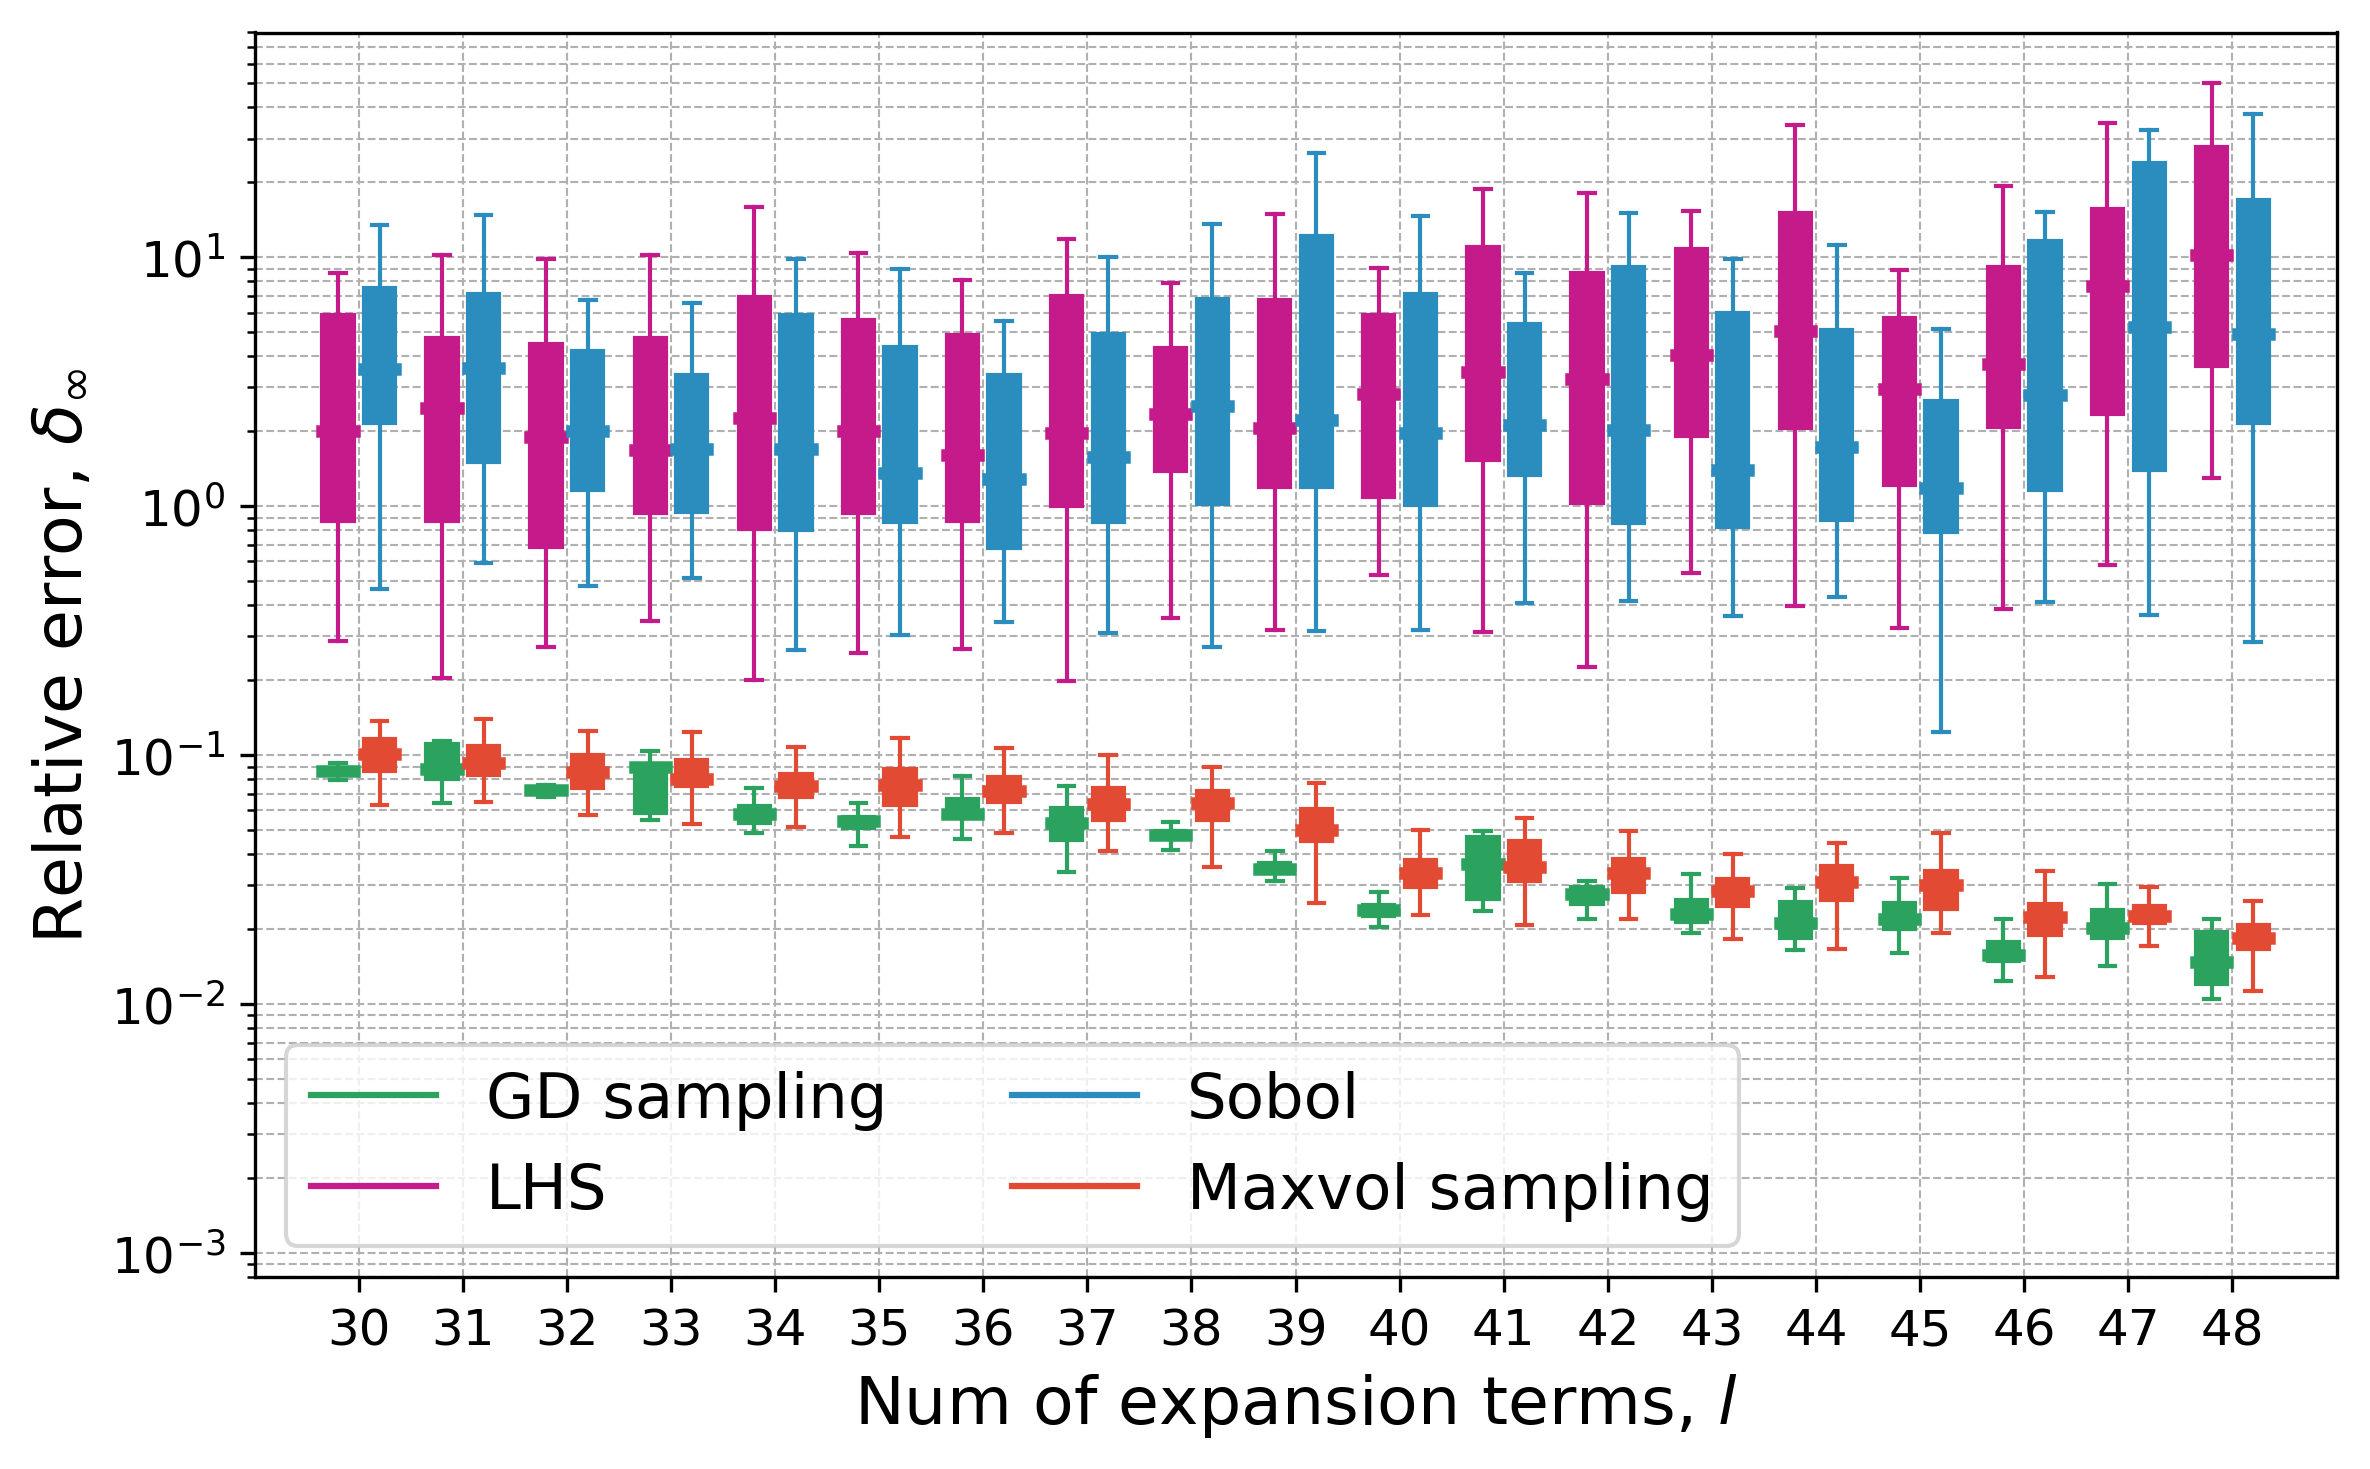

In [14]:
dim = 2

ticks = [i for i in range(30,49,1)]

medianprops = {'color': 'black', 'linewidth': 3}

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

fig = plt.figure(figsize=(8,5), dpi=300)
ax = fig.add_subplot(111)

# c = ['#2ca25f','#c51b8a','#2b8cbe','#e34a33']

# plt.plot(np.median(np.array(data_s),axis=1),'--s',color=c[0],markersize=4,lw=1)
# plt.plot(np.median(np.array(data_m),axis=1),'--d',color=c[1],markersize=4,lw=1)
# plt.plot(np.median(np.array(data_k),axis=1),'--h',color=c[2],markersize=4,lw=1)
# plt.plot(np.median(np.array(data),axis=1),'--o',color=c[3],markersize=4,lw=1)


bpl = plt.boxplot(data_s, medianprops=medianprops, positions=np.array(range(len(data_s)))*2.0-0.4, sym='', widths=0.6,patch_artist=True)
bpc = plt.boxplot(data_m, medianprops=medianprops, positions=np.array(range(len(data_m)))*2.0-0.4, sym='', widths=0.6,patch_artist=True)
bpk = plt.boxplot(data_k, medianprops=medianprops, positions=np.array(range(len(data_k)))*2.0+0.4, sym='', widths=0.6,patch_artist=True)
bpr = plt.boxplot(data, medianprops=medianprops, positions=np.array(range(len(data)))*2.0+0.4, sym='', widths=0.6,patch_artist=True)
set_box_color(bpl, '#2ca25f') # colors are from http://colorbrewer2.org/
set_box_color(bpc, '#c51b8a')
set_box_color(bpk, '#2b8cbe')
set_box_color(bpr, '#e34a33')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='#2ca25f', label='GD sampling')
plt.plot([], c='#c51b8a', label='LHS')
plt.plot([], c='#2b8cbe', label='Sobol')
plt.plot([], c='#e34a33', label='Maxvol sampling')
plt.legend(loc='best', ncol = 2, fontsize=15)

plt.xticks(range(0, len(ticks) * 2, 2), ticks,fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(-2, len(ticks)*2)
plt.ylim(0.8e-3, 8e1)
plt.xlabel("Num of expansion terms, $l$",fontsize=16)
#plt.ylabel("Lebesgue constant, $\mathbb{\Lambda}$",fontsize=16)
plt.ylabel("Relative error, $\delta_{\infty}$",fontsize=16)
ax.set_yscale('log')

# colors=4*['black']+['green']+4*['black']+['green']+2*['black']
# for color,tick in zip(colors,ax.xaxis.get_major_ticks()):
#     tick.label1.set_color(color)

plt.tight_layout()
plt.grid(True, which="both",axis='both',ls="--",lw=0.51)
# plt.savefig("/Users/vitaly/Desktop/oversampling/results/lebeg_2D_col-10_col-70_v3.pdf",\
#             dpi=300, bbox_inches='tight', transparent=True)
#plt.savefig("/Users/vitaly/Downloads/maxvol-approximation/thesis_results/results/lebeg_2D_col-10_col-70.png",\
#             dpi=300, bbox_inches='tight', transparent=True)

In [15]:
from ipywidgets import interactive, interact, widgets

In [16]:
def over(n_fact):
    facts = np.linspace(1,3,30)
    d = np.loadtxt('/Users/vitaly/Desktop/oversampling/results/n_factor='+str(round(facts[n_fact-1],3))+'_gauss_col=44_col=64_poly=cheb.txt')
    INFTY = np.split(d,4)[2]
    INFTY_s = np.split(d,4)[3]
    INFTY_m = np.split(d,4)[0]
    INFTY_k = np.split(d,4)[1]
    data = [INFTY[i,:] for i in range(len(INFTY))]
    data_s = [INFTY_s[i,:] for i in range(len(INFTY))]
    data_m = [INFTY_m[i,:] for i in range(len(INFTY))]
    data_k = [INFTY_k[i,:] for i in range(len(INFTY))]
    
    dim = 2

    ticks = [i for i in range(44,65,1)]

    medianprops = {'color': 'black', 'linewidth': 3}

    def set_box_color(bp, color):
        plt.setp(bp['boxes'], color=color)
        plt.setp(bp['whiskers'], color=color)
        plt.setp(bp['caps'], color=color)
        plt.setp(bp['medians'], color=color)

    fig = plt.figure(figsize=(8,5), dpi=300)
    ax = fig.add_subplot(111)

    # c = ['#2ca25f','#c51b8a','#2b8cbe','#e34a33']

    # plt.plot(np.median(np.array(data_s),axis=1),'--s',color=c[0],markersize=4,lw=1)
    # plt.plot(np.median(np.array(data_m),axis=1),'--d',color=c[1],markersize=4,lw=1)
    # plt.plot(np.median(np.array(data_k),axis=1),'--h',color=c[2],markersize=4,lw=1)
    # plt.plot(np.median(np.array(data),axis=1),'--o',color=c[3],markersize=4,lw=1)


    bpl = plt.boxplot(data_s, medianprops=medianprops, positions=np.array(range(len(data_s)))*2.0-0.4, sym='', widths=0.6,patch_artist=True)
    bpc = plt.boxplot(data_m, medianprops=medianprops, positions=np.array(range(len(data_m)))*2.0-0.4, sym='', widths=0.6,patch_artist=True)
    bpk = plt.boxplot(data_k, medianprops=medianprops, positions=np.array(range(len(data_k)))*2.0+0.4, sym='', widths=0.6,patch_artist=True)
    bpr = plt.boxplot(data, medianprops=medianprops, positions=np.array(range(len(data)))*2.0+0.4, sym='', widths=0.6,patch_artist=True)
    set_box_color(bpl, '#2ca25f') # colors are from http://colorbrewer2.org/
    set_box_color(bpc, '#c51b8a')
    set_box_color(bpk, '#2b8cbe')
    set_box_color(bpr, '#e34a33')

    # draw temporary red and blue lines and use them to create a legend
    plt.plot([], c='#2ca25f', label='GD sampling')
    plt.plot([], c='#c51b8a', label='LHS')
    plt.plot([], c='#2b8cbe', label='Sobol')
    plt.plot([], c='#e34a33', label='Maxvol sampling')
    plt.legend(loc='best', ncol = 2, fontsize=15)

    plt.xticks(range(0, len(ticks) * 2, 2), ticks,fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlim(-2, len(ticks)*2)
    plt.ylim(7e-4, 2e2)
    plt.xlabel("Num of expansion terms, $l$",fontsize=16)
    #plt.ylabel("Lebesgue constant, $\mathbb{\Lambda}$",fontsize=16)
    plt.ylabel("Relative error, $\delta_{\infty}$",fontsize=16)
    ax.set_yscale('log')
    #plt.title("Sincos function approximation, Chebyshev Polynomials")#"$f(x,y) = \sin(x^2/2 - y^2/4+3)\cos(2x+1-e^y)$")

    # colors=4*['black']+['green']+4*['black']+['green']+2*['black']
    # for color,tick in zip(colors,ax.xaxis.get_major_ticks()):
    #     tick.label1.set_color(color)

    plt.tight_layout()
    plt.grid(True, which="both",axis='both',ls="--",lw=0.51)
#     plt.savefig("/Users/vitaly/Desktop/oversampling/results/factor_2.5_gauss_col-44_col-64.pdf",\
#             dpi=300, bbox_inches='tight', transparent=True)
    print('n_fact=',str(round(facts[n_fact-1],3)))
    #plt.show
    
controls = {r'n_fact': widgets.IntSlider(min=1, max=30, step=1, value=1, continuous_update=False, description=r'$n_{fact}$')}

In [17]:
interact(over, **controls);  

interactive(children=(IntSlider(value=1, continuous_update=False, description='$n_{fact}$', max=30, min=1), Ou…

In [16]:
for i in range(44,65): print(i,np.max(gen.indeces_K_cut(dim, i)))

44 8
45 8
46 8
47 8
48 8
49 8
50 8
51 8
52 8
53 8
54 9
55 9
56 9
57 9
58 9
59 9
60 9
61 9
62 9
63 9
64 9


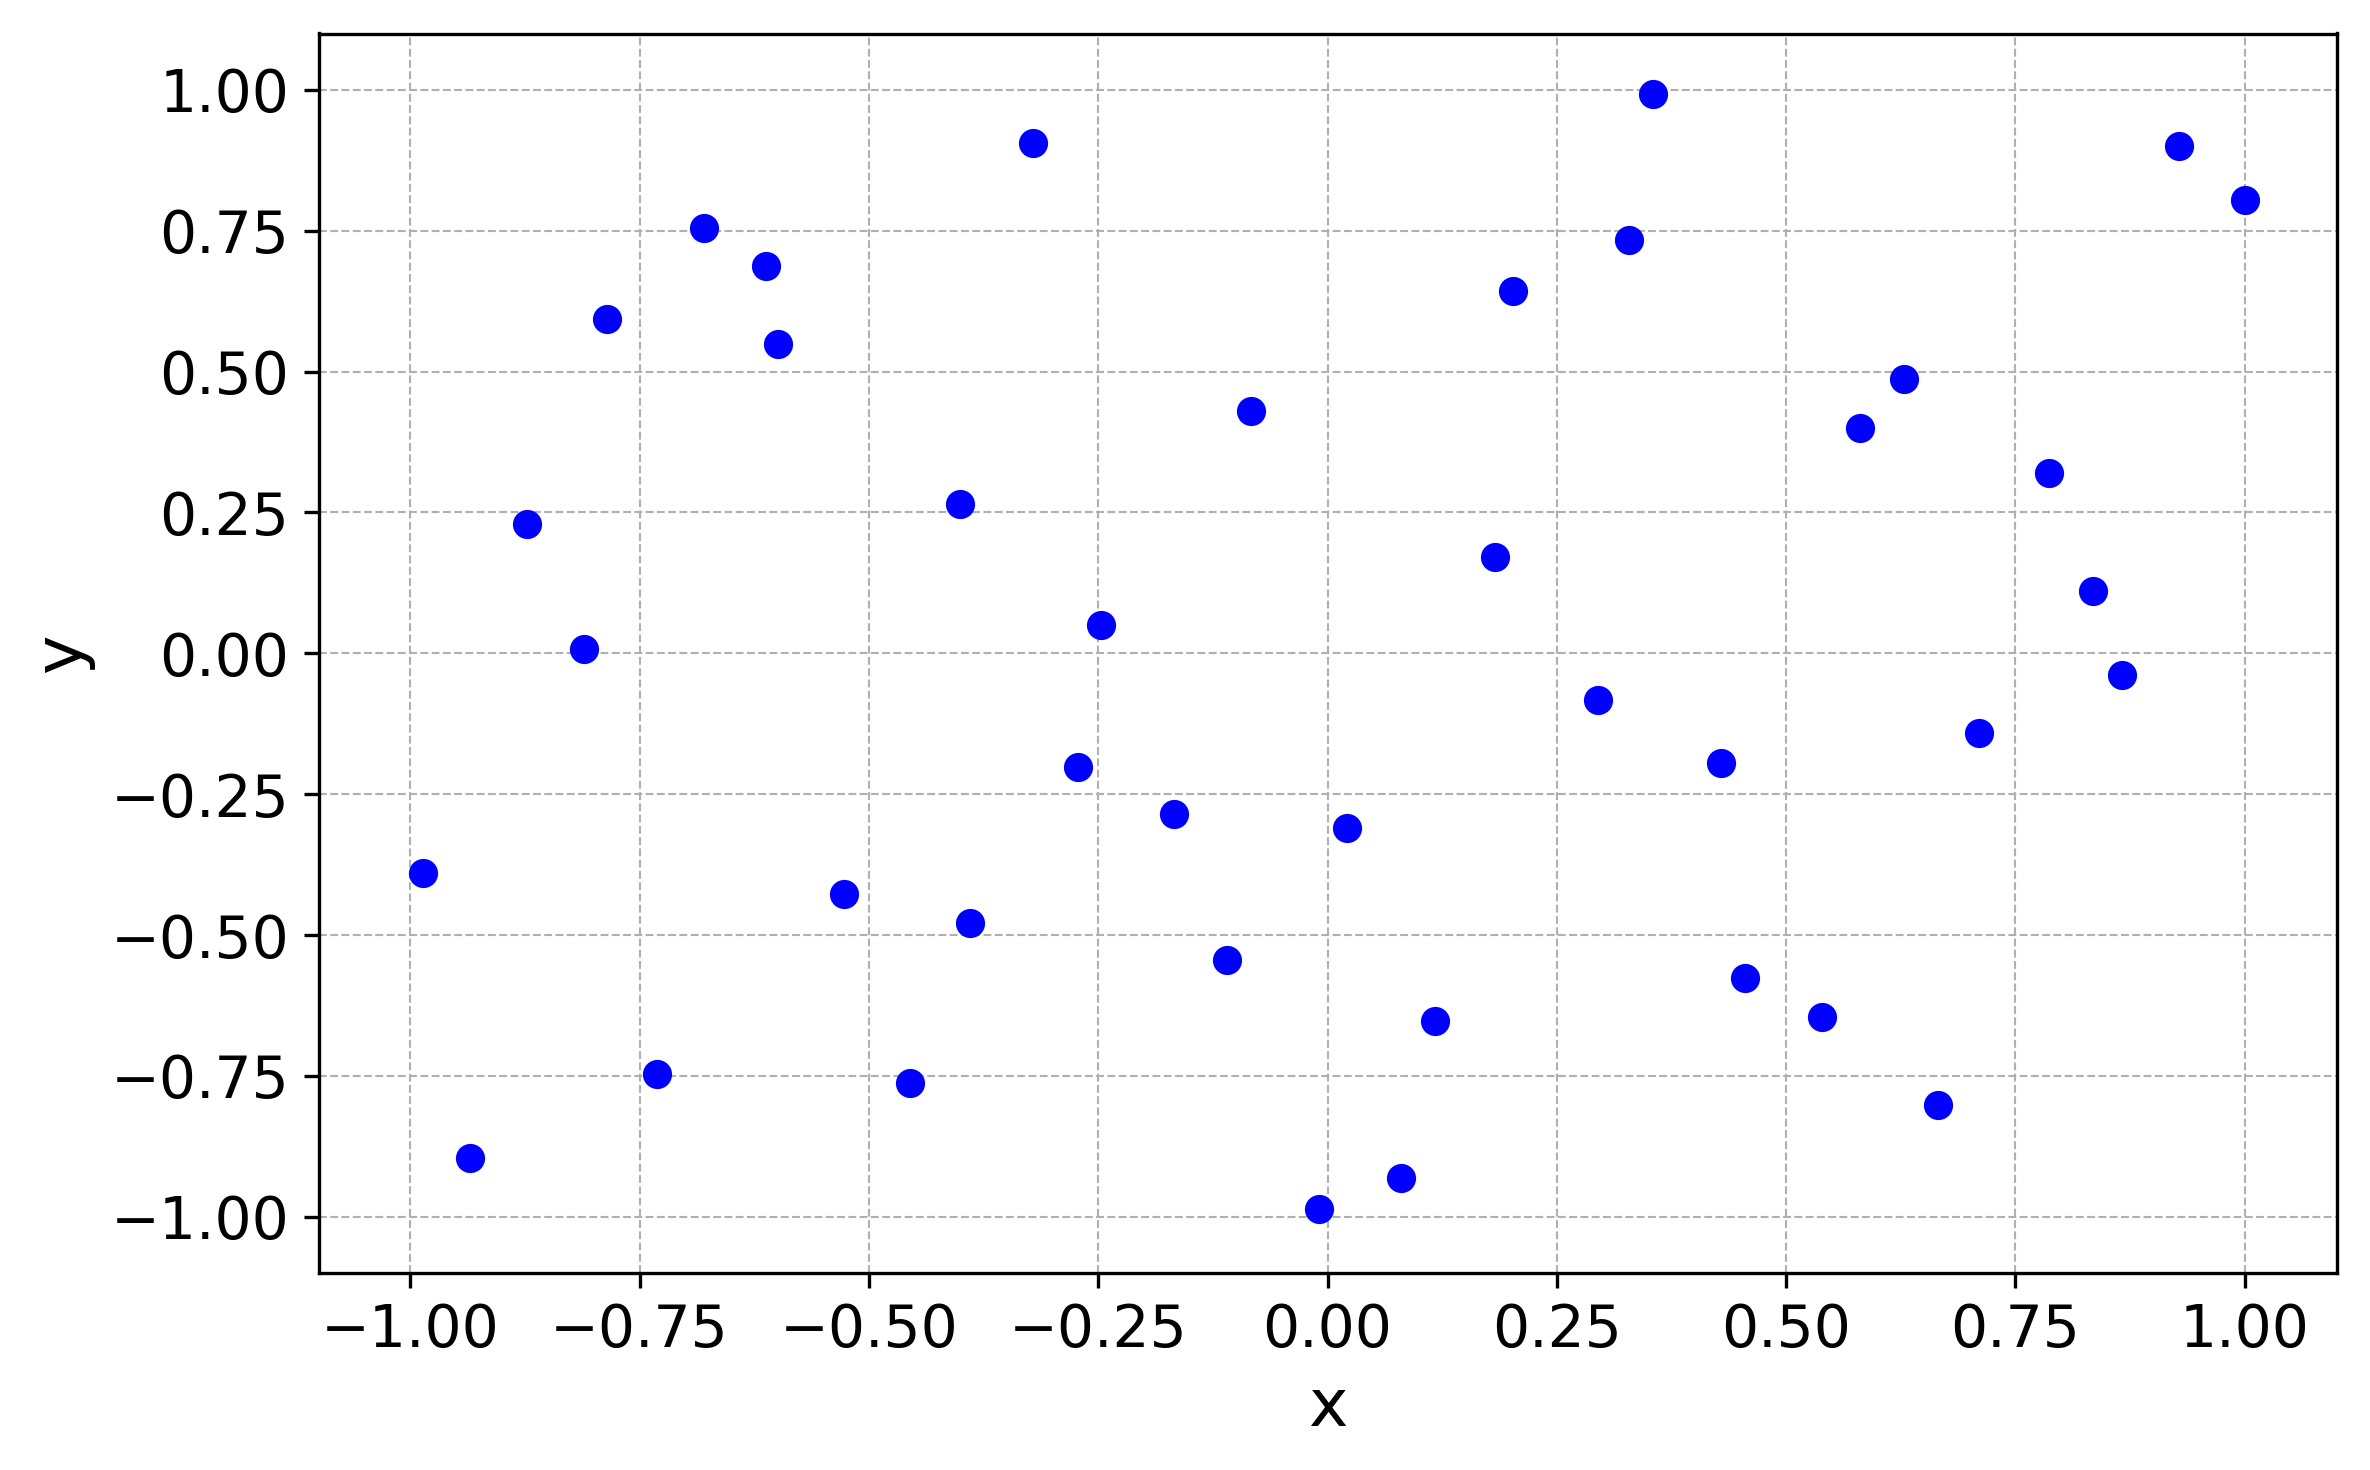

In [17]:
# visualization part
# position of the chosen points by MaxVol and GD in 2-D case
fig = plt.figure(figsize=(8,5), dpi=300)
smp = test_points_gen(interval=(-1.0,1.0),n_test=40,nder=2,distrib='LHS',criterion='m',iterations=10)
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
#plt.plot(M[row_indx,1], M[row_indx,2], 'ro', label = "MV")
plt.plot(smp[:,0], smp[:,1], 'bo', label = "GD")
plt.xlabel("x",fontsize=16)
plt.ylabel("y",fontsize=16)
#plt.plot(smp_sbl[:,0],smp_sbl[:,1], 'm*', label = "Sobol")
#plt.plot(smp[:,0],smp[:,1], 'go', label = "LHS")
#plt.plot(smp_rndm[:,0],smp_rndm[:,1], 'bx', label = "Random")
#plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=4, borderaxespad=0.1)
plt.tight_layout()
plt.grid(True, which="both",axis='both',ls="--",lw=0.51)
# plt.savefig("/Users/vitaly/Desktop/oversampling/results/lhs_40.pdf",\
#            dpi=300, bbox_inches='tight', transparent=True)
plt.show()

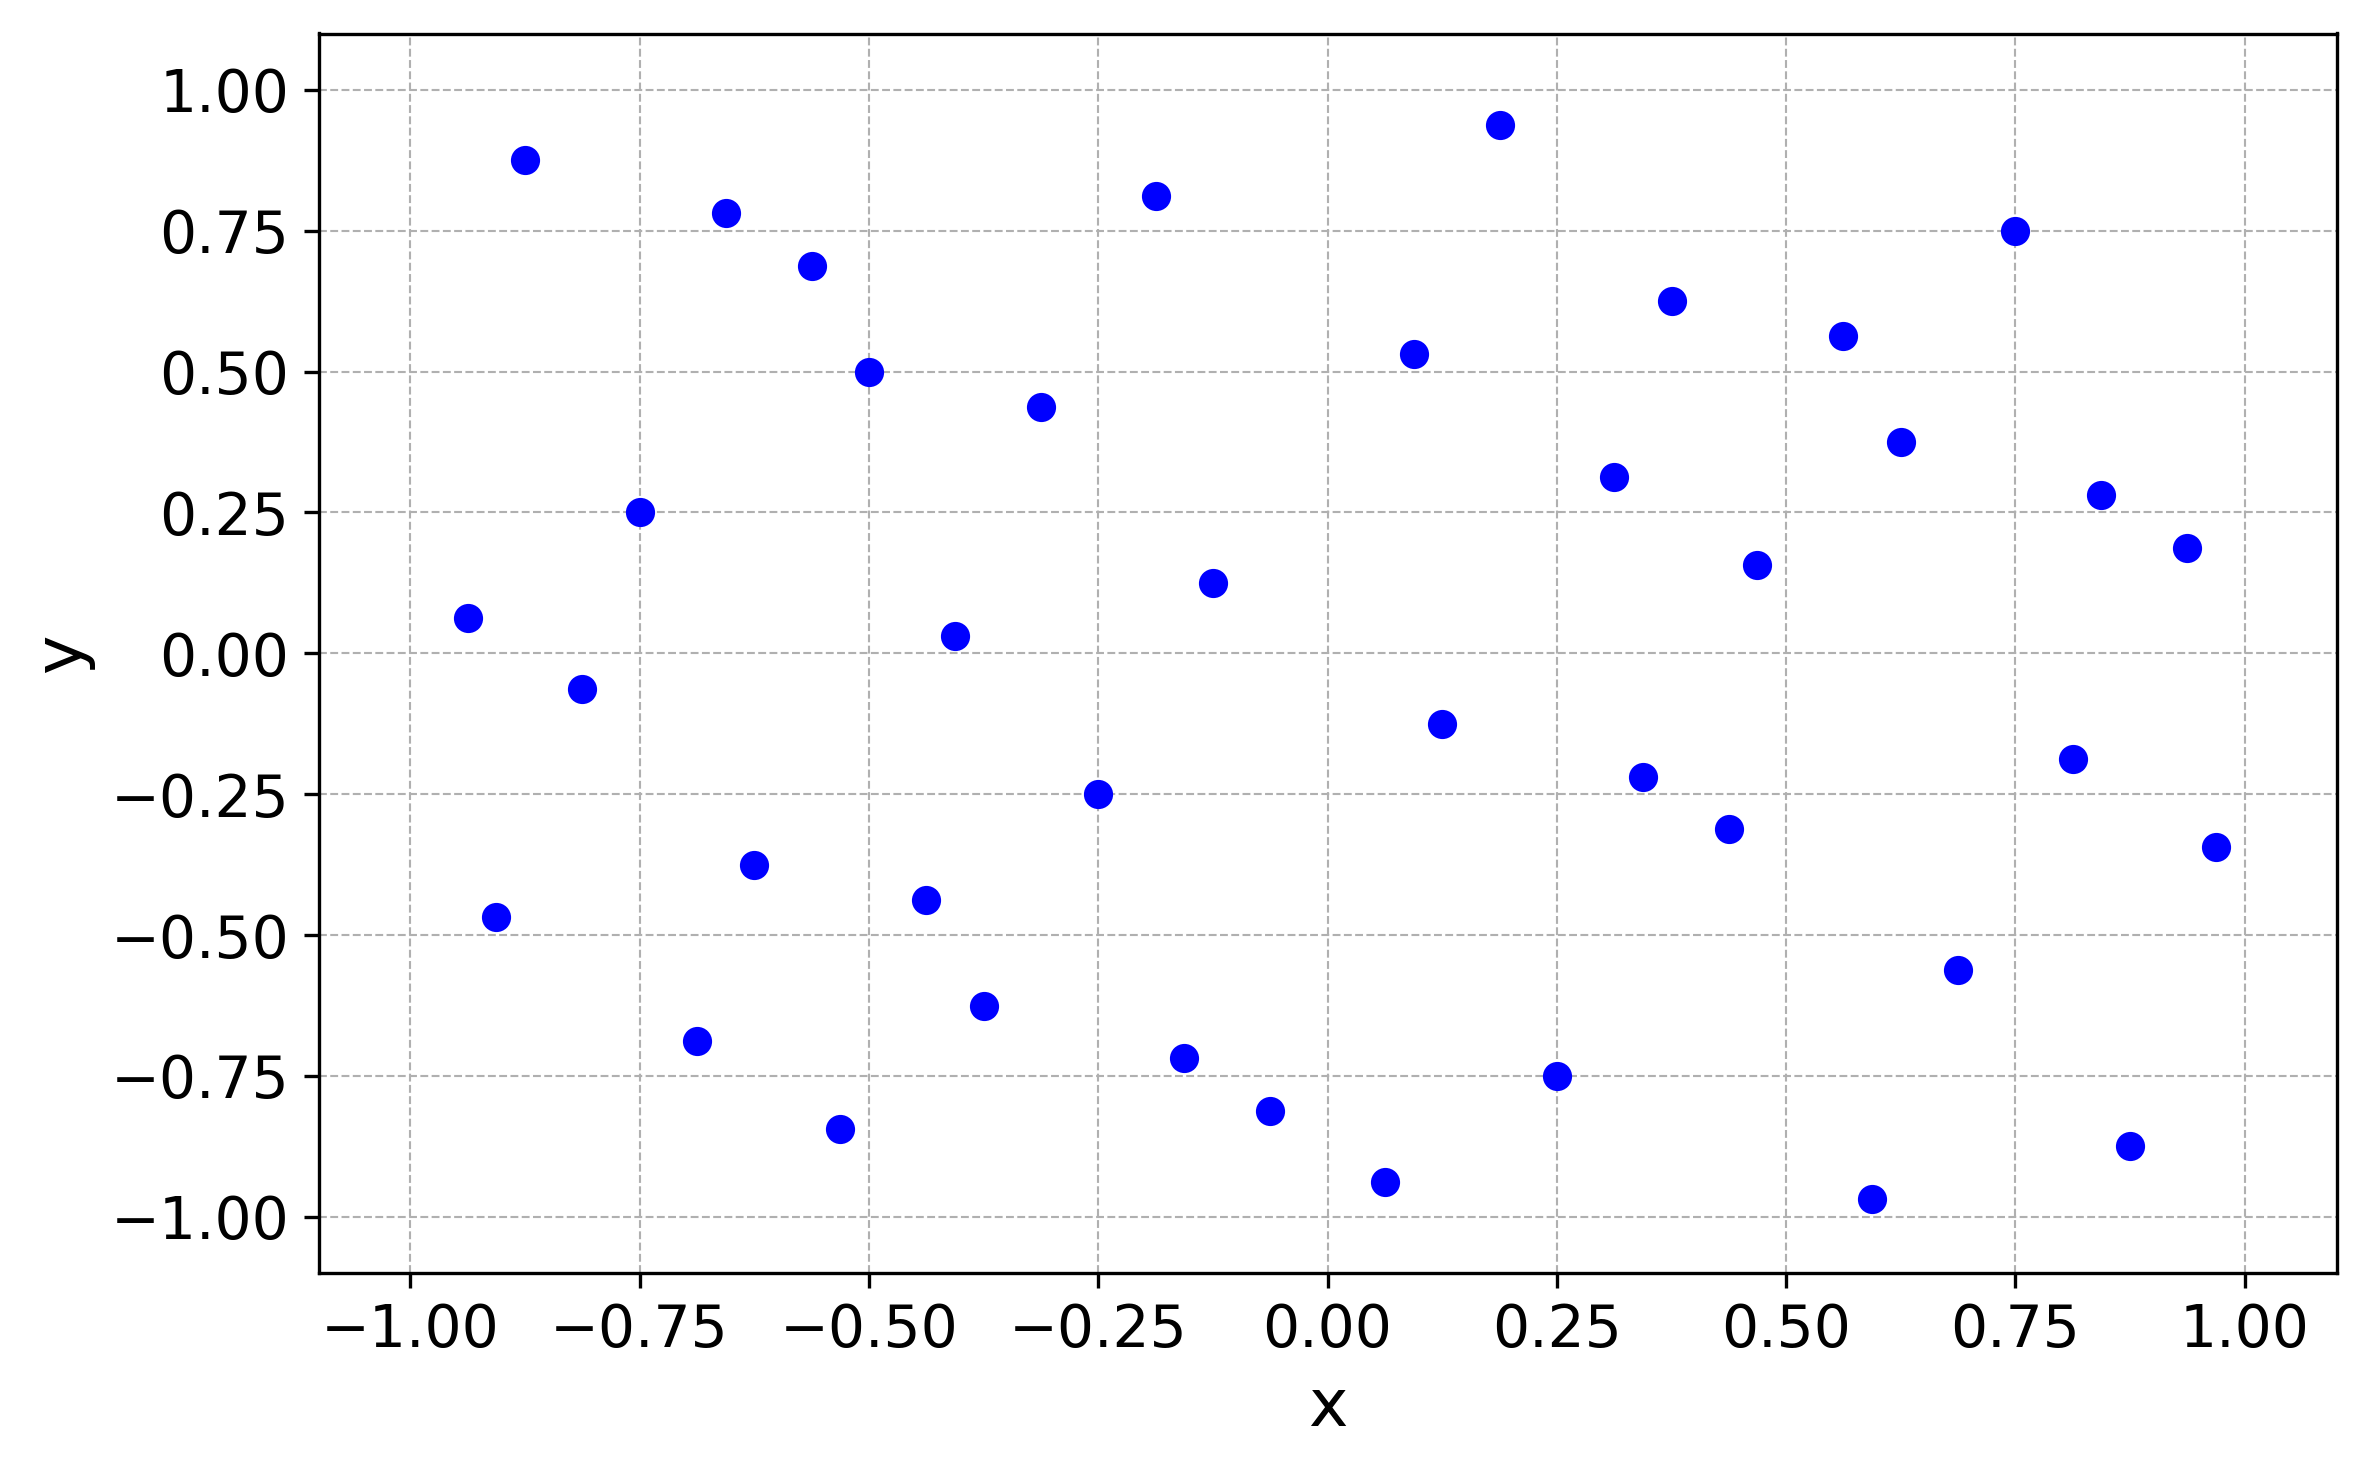

In [18]:
smp = test_points_gen(interval=(-1.0,1.0),n_test=40,nder=2,distrib='Sobol',seed=3)
fig = plt.figure(figsize=(8,5), dpi=300)
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
#plt.plot(M[row_indx,1], M[row_indx,2], 'ro', label = "MV")
plt.plot(smp[:,0], smp[:,1], 'bo', label = "GD")
plt.xlabel("x",fontsize=16)
plt.ylabel("y",fontsize=16)
#plt.plot(smp_sbl[:,0],smp_sbl[:,1], 'm*', label = "Sobol")
#plt.plot(smp[:,0],smp[:,1], 'go', label = "LHS")
#plt.plot(smp_rndm[:,0],smp_rndm[:,1], 'bx', label = "Random")
#plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=4, borderaxespad=0.1)
plt.tight_layout()
plt.grid(True, which="both",axis='both',ls="--",lw=0.51)
# plt.savefig("/Users/vitaly/Desktop/oversampling/results/sobol_40.pdf",\
#            dpi=300, bbox_inches='tight', transparent=True)
plt.show()

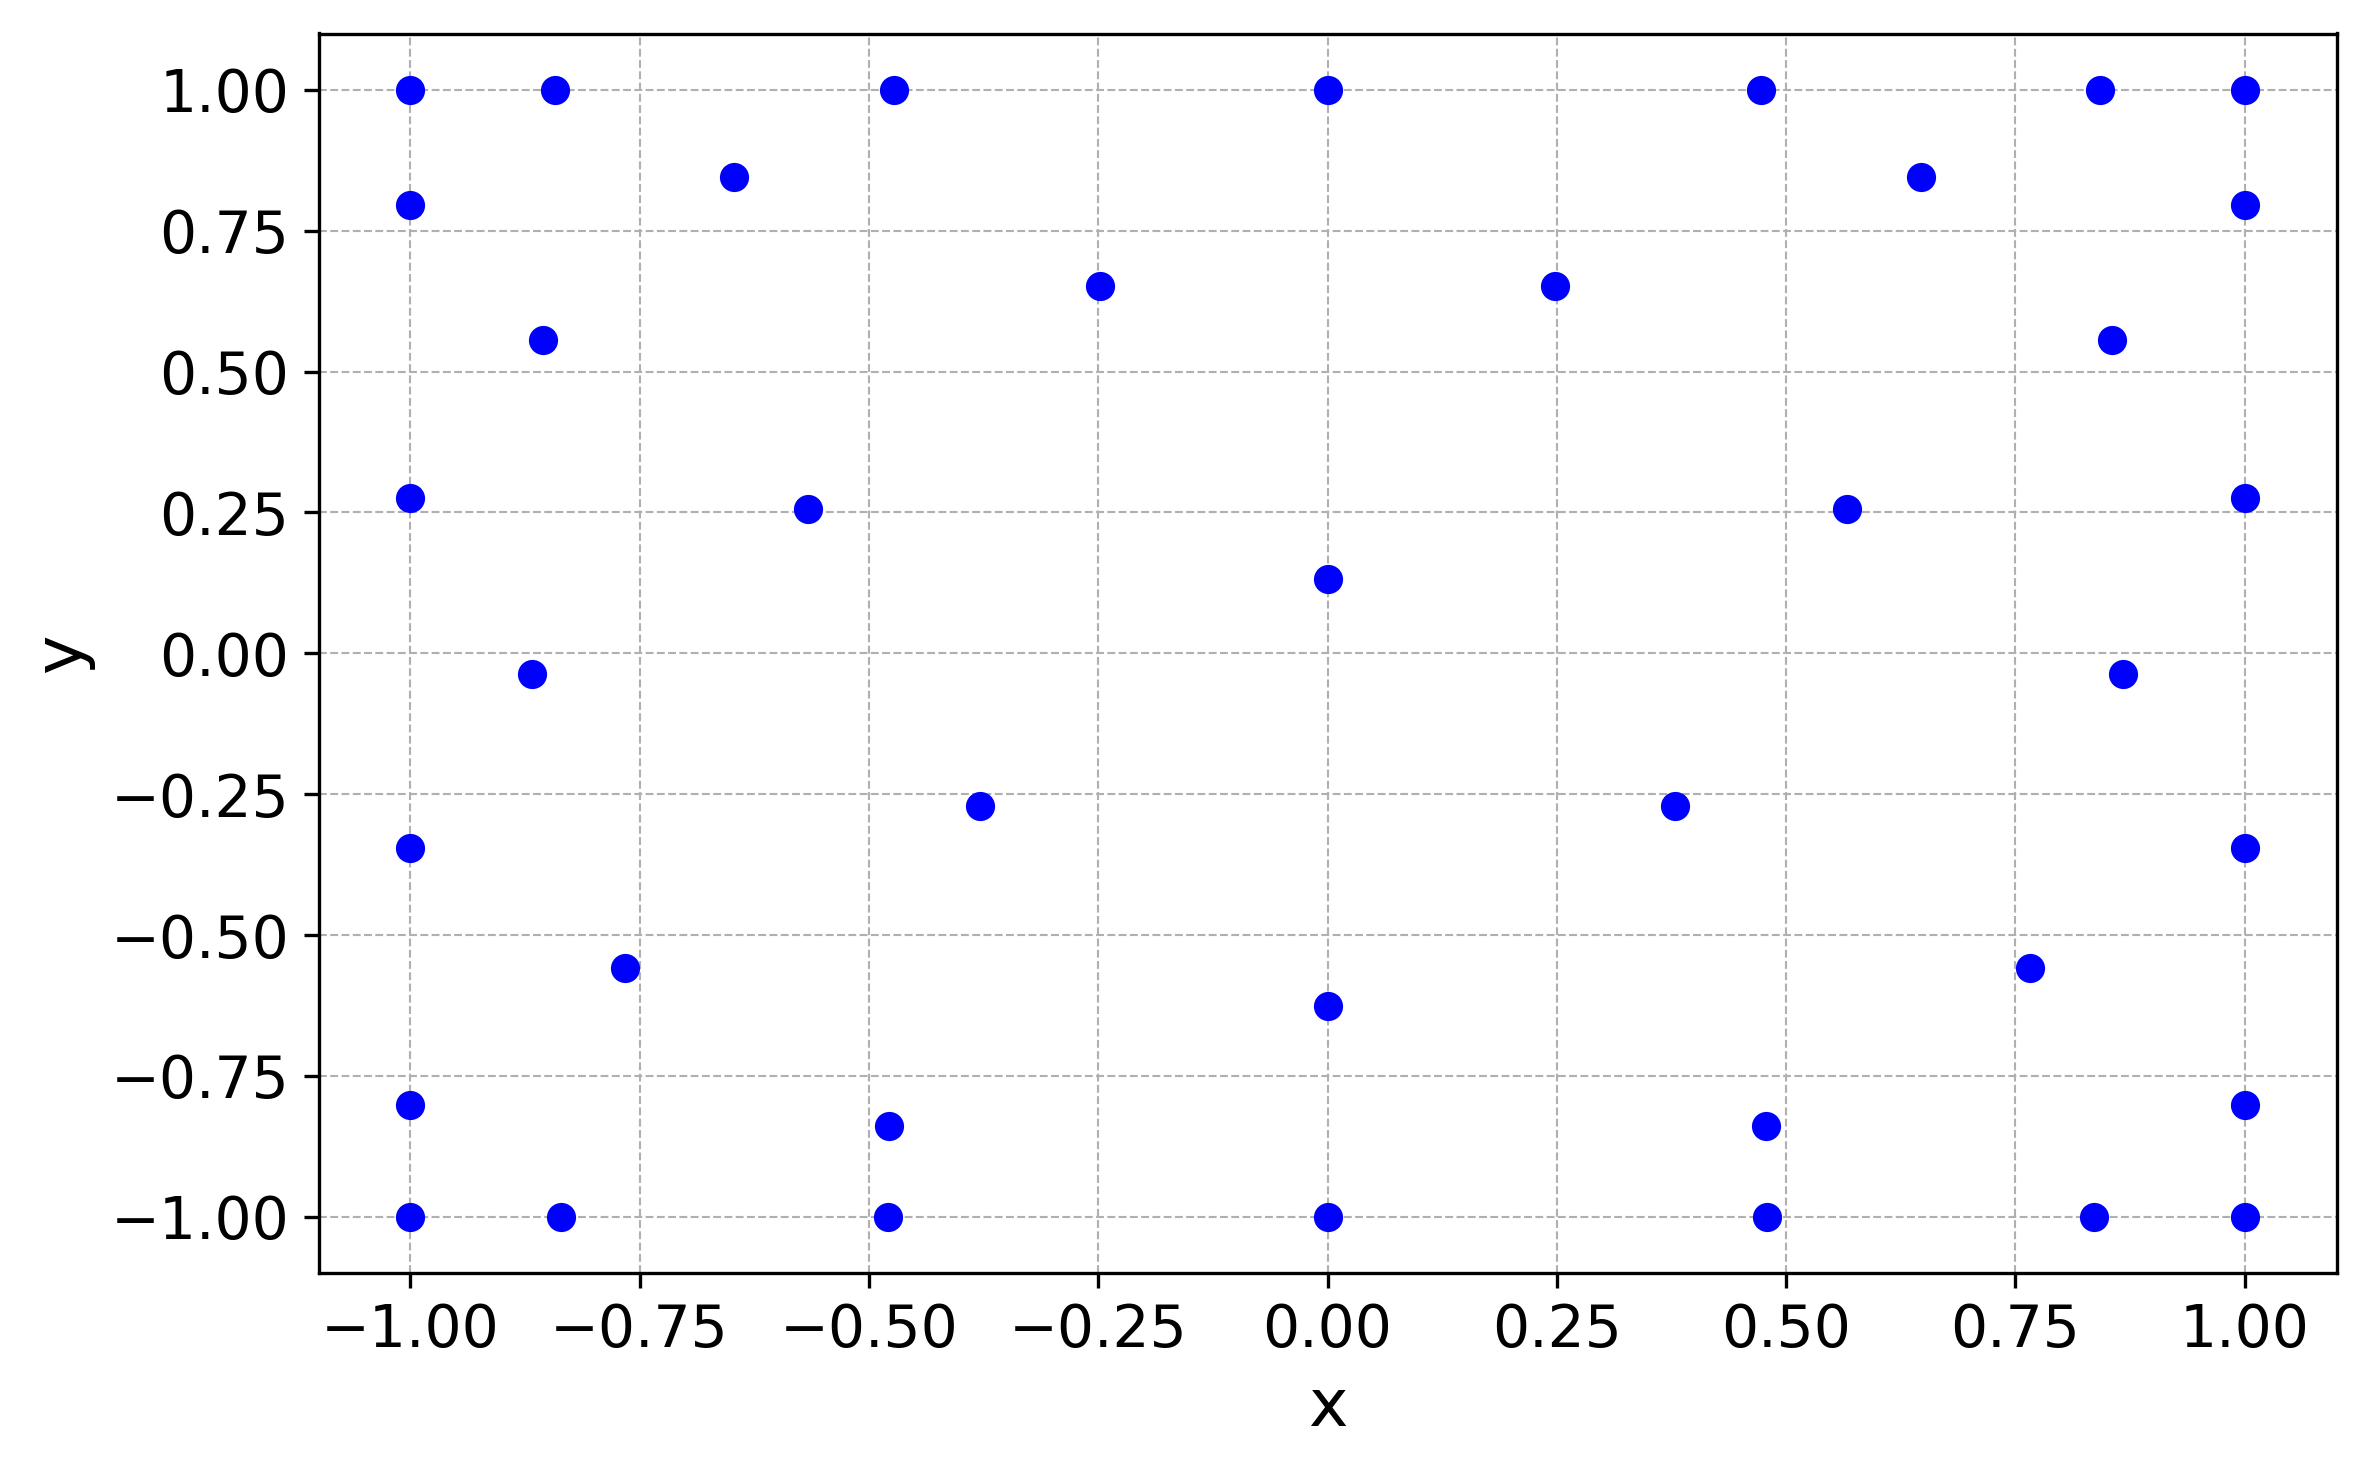

In [19]:
smp = GD_points(num_col=40,num_points=40, interval=(-1.0,1.0))
fig = plt.figure(figsize=(8,5), dpi=300)
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
#plt.plot(M[row_indx,1], M[row_indx,2], 'ro', label = "MV")
plt.plot(smp[:,0], smp[:,1], 'bo', label = "GD")
plt.xlabel("x",fontsize=16)
plt.ylabel("y",fontsize=16)
#plt.plot(smp_sbl[:,0],smp_sbl[:,1], 'm*', label = "Sobol")
#plt.plot(smp[:,0],smp[:,1], 'go', label = "LHS")
#plt.plot(smp_rndm[:,0],smp_rndm[:,1], 'bx', label = "Random")
#plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=4, borderaxespad=0.1)
plt.tight_layout()
plt.grid(True, which="both",axis='both',ls="--",lw=0.51)
# plt.savefig("/Users/vitaly/Downloads/maxvol-approximation/thesis_results/results/gd_40.png",\
#            dpi=300, bbox_inches='tight', transparent=True)
plt.show()

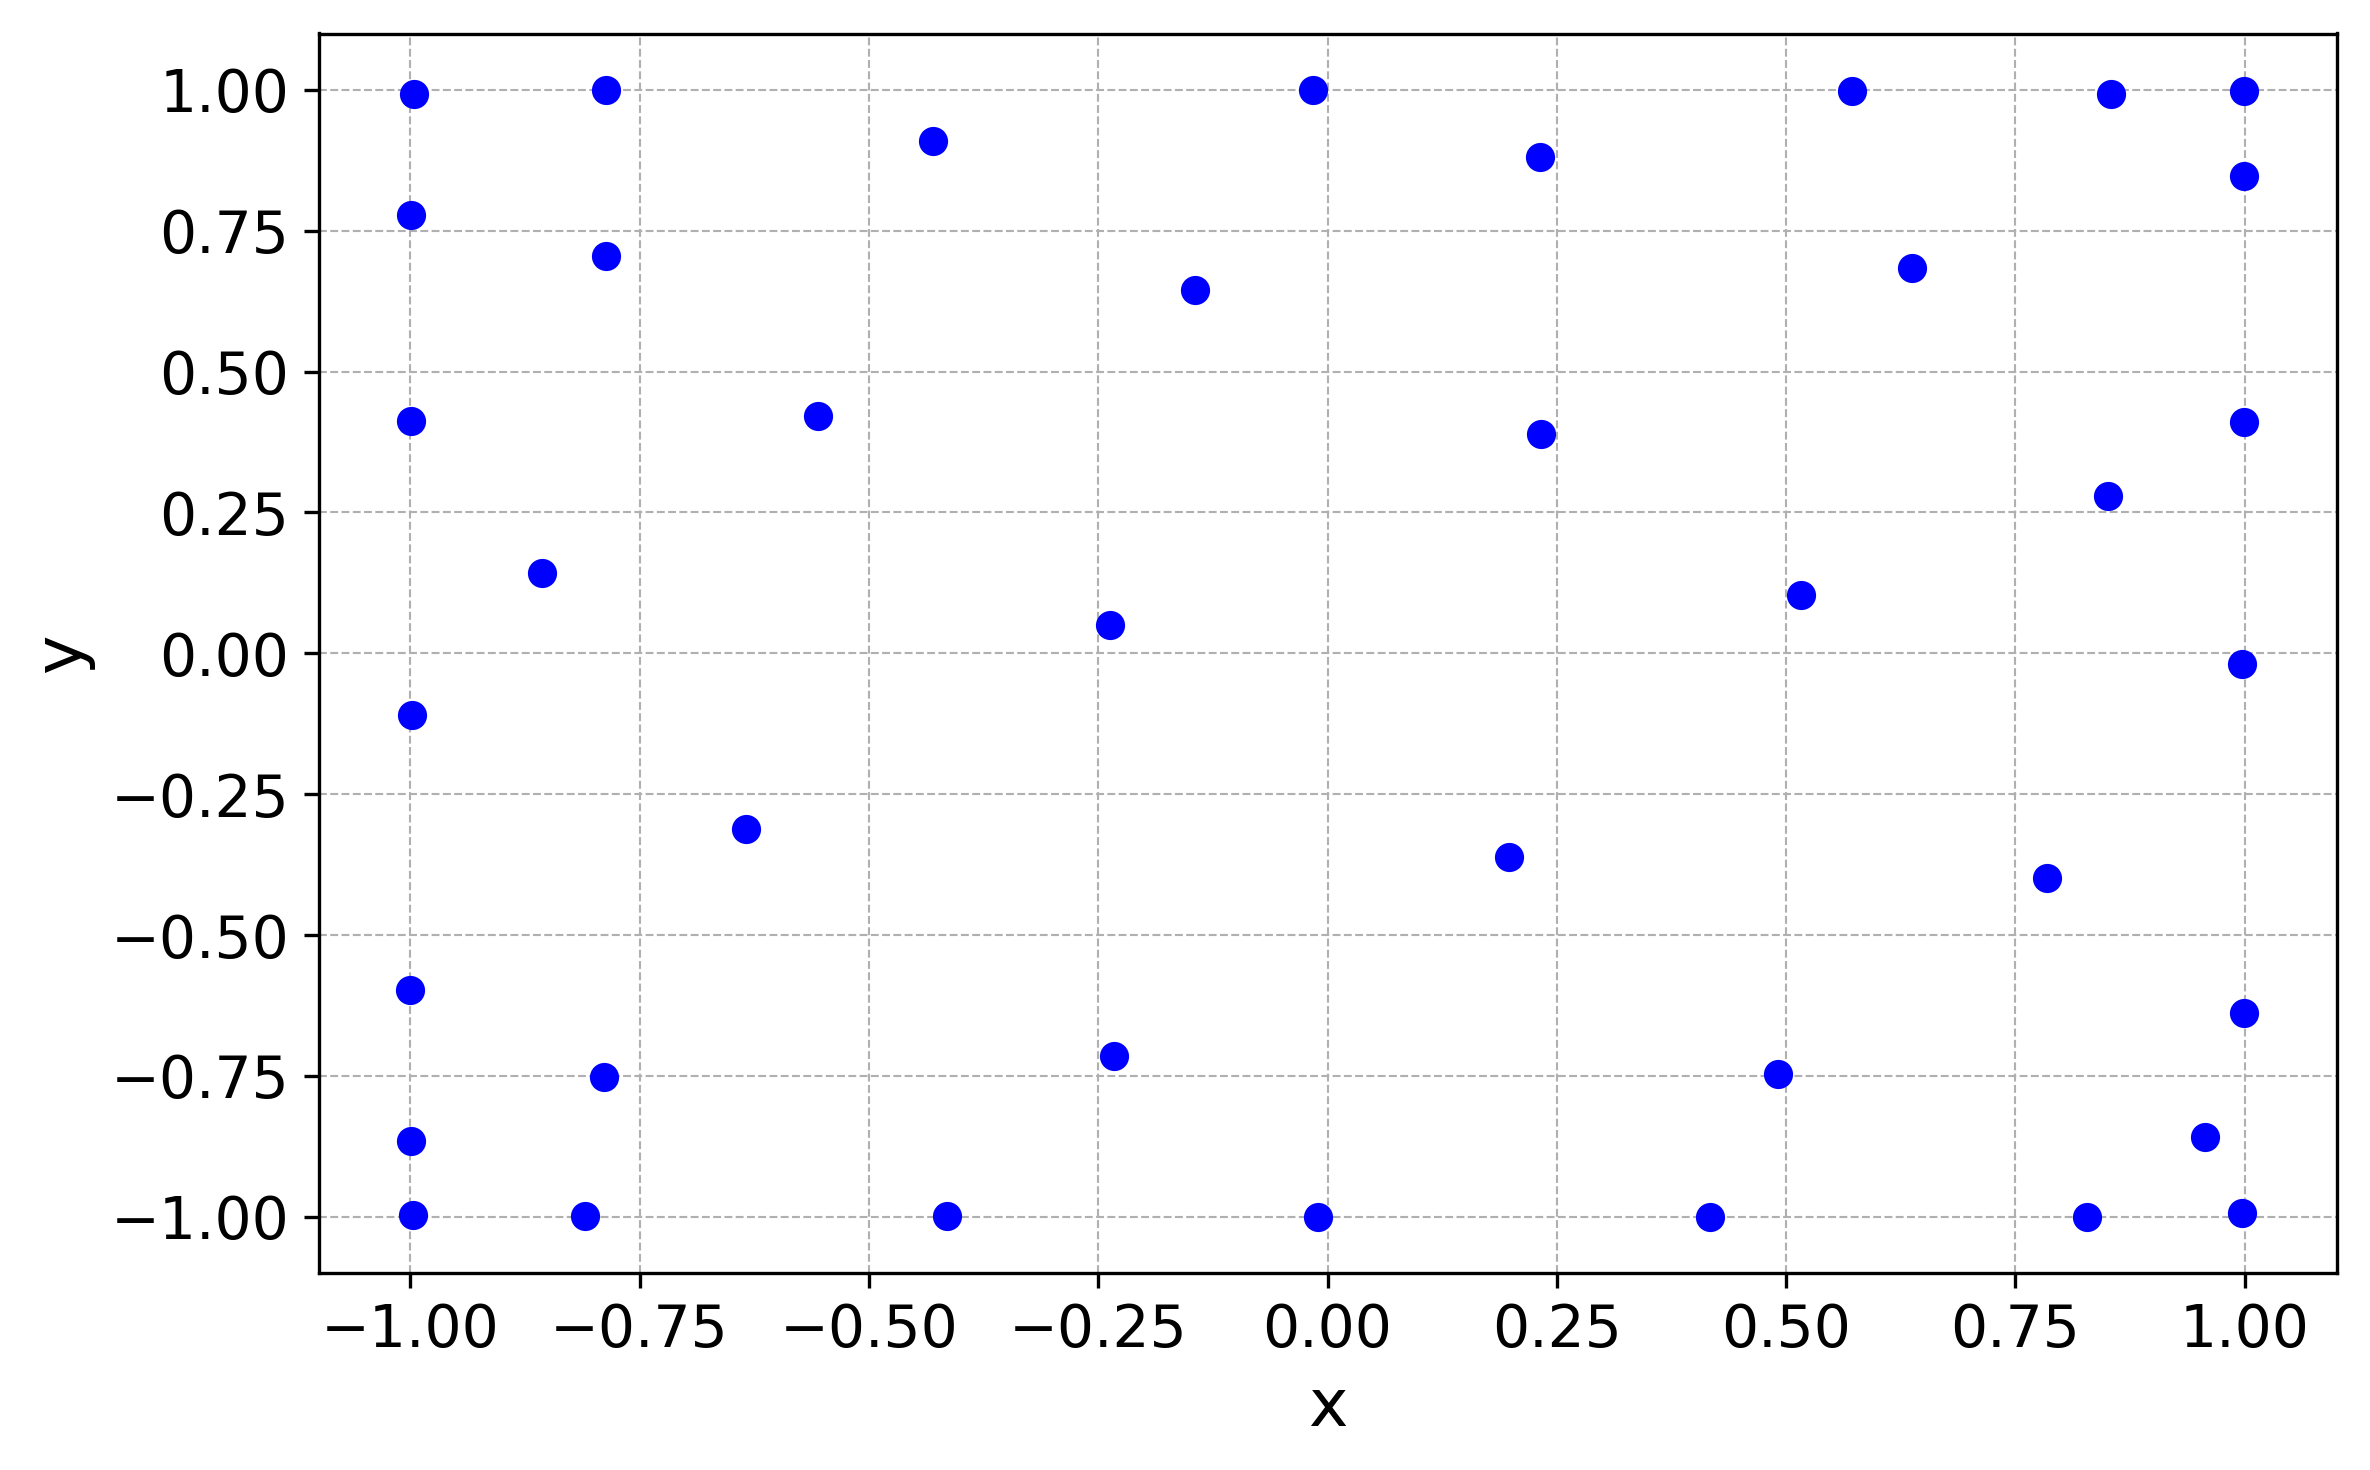

In [20]:
smp = Maxvol_points(num_col=40, num_points=40, interval=(-1.0,1.0))
fig = plt.figure(figsize=(8,5), dpi=300)
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
#plt.plot(M[row_indx,1], M[row_indx,2], 'ro', label = "MV")
plt.plot(smp[:,0], smp[:,1], 'bo', label = "GD")
plt.xlabel("x",fontsize=16)
plt.ylabel("y",fontsize=16)
#plt.plot(smp_sbl[:,0],smp_sbl[:,1], 'm*', label = "Sobol")
#plt.plot(smp[:,0],smp[:,1], 'go', label = "LHS")
#plt.plot(smp_rndm[:,0],smp_rndm[:,1], 'bx', label = "Random")
#plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=4, borderaxespad=0.1)
plt.tight_layout()
plt.grid(True, which="both",axis='both',ls="--",lw=0.51)
# plt.savefig("/Users/vitaly/Desktop/oversampling/results/maxvol_40.pdf",\
#            dpi=300, bbox_inches='tight', transparent=True)
plt.show()